#Prodigy Task 4

Step 1:Necessary sentiment analysis library.

In [2]:
!pip install vaderSentiment

Step 2: Setup and Data Loading

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# The dataset has no headers, so we will provide them.
url = 'https://raw.githubusercontent.com/Prodigy-InfoTech/data-science-datasets/main/Task%204/twitter_training.csv'
df = pd.read_csv(url, header=None)
df.columns = ['ID', 'Topic', 'Sentiment_GroundTruth', 'Tweet_Text']

print("Dataset loaded successfully.")
print(df.head())

Dataset loaded successfully.
     ID        Topic Sentiment_GroundTruth  \
0  2401  Borderlands              Positive   
1  2401  Borderlands              Positive   
2  2401  Borderlands              Positive   
3  2401  Borderlands              Positive   
4  2401  Borderlands              Positive   

                                          Tweet_Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


Step 3: Data Cleaning

In [4]:
df.dropna(subset=['Tweet_Text'], inplace=True)
print("Data cleaned. Shape after dropping nulls:", df.shape)

Data cleaned. Shape after dropping nulls: (73996, 4)


Step 4: Sentiment Analysis

In [5]:
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    # The 'compound' score is a single metric for the overall sentiment.
    score = analyzer.polarity_scores(text)
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Tweet_Text'].apply(get_vader_sentiment)

print("Sentiment analysis complete.")
print(df[['Tweet_Text', 'Sentiment']].head())

Sentiment analysis complete.
                                          Tweet_Text Sentiment
0  im getting on borderlands and i will murder yo...  Negative
1  I am coming to the borders and I will kill you...  Negative
2  im getting on borderlands and i will kill you ...  Negative
3  im coming on borderlands and i will murder you...  Negative
4  im getting on borderlands 2 and i will murder ...  Negative


Step 5: Visualization

/tmp/ipython-input-1683936602.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


Plot saved as 'sentiment_distribution.png'


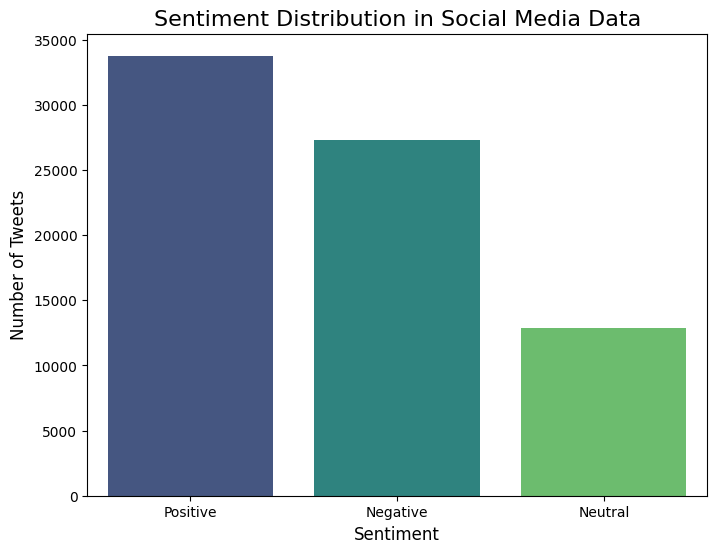


Sentiment Counts:
Sentiment
Positive    33784
Negative    27323
Neutral     12889
Name: count, dtype: int64


In [6]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution in Social Media Data', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)

plt.savefig('sentiment_distribution.png', dpi=300)
print("Plot saved as 'sentiment_distribution.png'")
plt.show()

print("\nSentiment Counts:")
print(sentiment_counts)